# *Task 1: Iris Data Preprocessing and Exploration*

In [1]:
# Import required libraries
import  warnings
import pandas as pd
import numpy as np
import random
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

warnings.simplefilter(action="ignore")  


## *Step 1: Load the Iris dataset*

In [2]:
iris = load_iris()

# Create a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target  # Add species as numeric label initially

# Map numeric labels to actual species names for clarity
iris_df['species'] = iris_df['species'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

# Display first 5 rows
print("First 5 rows of the dataset:")
iris_df.head()

First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### *Description of the Code*

1. *Load the Iris dataset:*  
   The `load_iris()` function from `sklearn.datasets` is used to load the Iris dataset, which contains 150 samples with 4 features (sepal length, sepal width, petal length, petal width) and a target variable representing three species.

2. *Create a pandas DataFrame:*  
   The feature data is converted into a pandas DataFrame with proper column names for easier handling and analysis.

3. *Add the species column:*  
   The numeric target labels (0, 1, 2) are added as a new column named `species`.

4. *Map numeric labels to species names:*  
   The numeric labels are mapped to actual species names: `0 → setosa`, `1 → versicolor`, `2 → virginica`. This makes the data more readable.

5. *Display first 5 rows:*  
   The first five rows of the DataFrame are displayed to verify that the dataset is correctly loaded and labeled.


## *Step 2:Data Preprocessing*

### a) Check Missing Values

In [3]:
print("\nMissing values in each column:")
print(iris_df.isnull().sum())


Missing values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


#### *Explanation of the Output*

* The output shows the number of missing values in each column of the `iris_df` DataFrame.
* Each feature column (`sepal length (cm)`, `sepal width (cm)`, `petal length (cm)`, `petal width (cm)`) has **0 missing values**, indicating that all 150 observations have valid measurements.
* The `species` column also has **0 missing values**, meaning every sample has a corresponding species label.
* Overall, the dataset is complete with no missing data, so no imputation or cleaning is required for these columns.


### b) Normalize Features Using Min-Max Scaling

*This code normalizes the feature columns of the Iris dataset using Min-Max scaling. The `MinMaxScaler` from `sklearn.preprocessing` rescales each feature to a range between 0 and 1. Specifically, the columns corresponding to `sepal length`, `sepal width`, `petal length`, and `petal width` are transformed, ensuring all features are on a comparable scale for machine learning algorithms.*


In [4]:
# Feature scaling
# type:ignore
scaler = MinMaxScaler()
iris_scaled = iris_df.copy()
iris_scaled [iris.feature_names] = scaler.fit_transform(iris_df[iris.feature_names])
iris_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa


### *c) Encode Class Labels*

*This code uses `LabelEncoder` from scikit-learn to convert the categorical column `species` in the `iris_df` DataFrame into numerical form. Each unique species name is assigned a unique integer, and the encoded values are stored in a new column named `species_encoded`. This encoding is useful for machine learning algorithms that require numerical input.*


In [5]:
# 2c: Encode class labels if needed (label encoding shown here)
label_encoder = LabelEncoder()
iris_df['species_encoded'] = label_encoder.fit_transform(iris_df['species'])

*This code encodes the categorical class labels (`species`) into numeric form using `LabelEncoder` from `sklearn.preprocessing`. The new column `species_encoded` contains integer values representing each species (`setosa`, `versicolor`, `virginica`), which is often required for machine learning models that cannot handle string labels directly.*


In [6]:
iris_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa


## *Step 3: Data Exploration*

### *3a: Summary statistics*

In [7]:
print("\nSummary statistics:")
iris_scaled.describe().round(4)



Summary statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.0000,150.0000,150.0000,150.0000
mean,0.4287,0.4406,0.4675,0.4581
std,0.2300,0.1816,0.2992,0.3176
min,0.0000,0.0000,0.0000,0.0000
25%,0.2222,0.3333,0.1017,0.0833
50%,0.4167,0.4167,0.5678,0.5000
75%,0.5833,0.5417,0.6949,0.7083
max,1.0000,1.0000,1.0000,1.0000


### *Interpret the Summary Statistics*

- *The summary statistics indicate that all features—sepal length, sepal width, petal length, and petal width—have been normalized to the range \[0, 1] using Min-Max scaling*

- *The feature means are approximately 0.43–0.47, and standard deviations range from 0.18 to 0.32, reflecting moderate variability among samples.* 

- *The medians (50th percentile) show that sepal length and width are balanced around 0.42, whereas petal length and width are slightly higher, highlighting differences across species.*

- *This preprocessing ensures that all features contribute equally to models such as K-Means, Decision Tree, or KNN, and prevents bias from differently scaled features.*



## *3b: Visualizations*

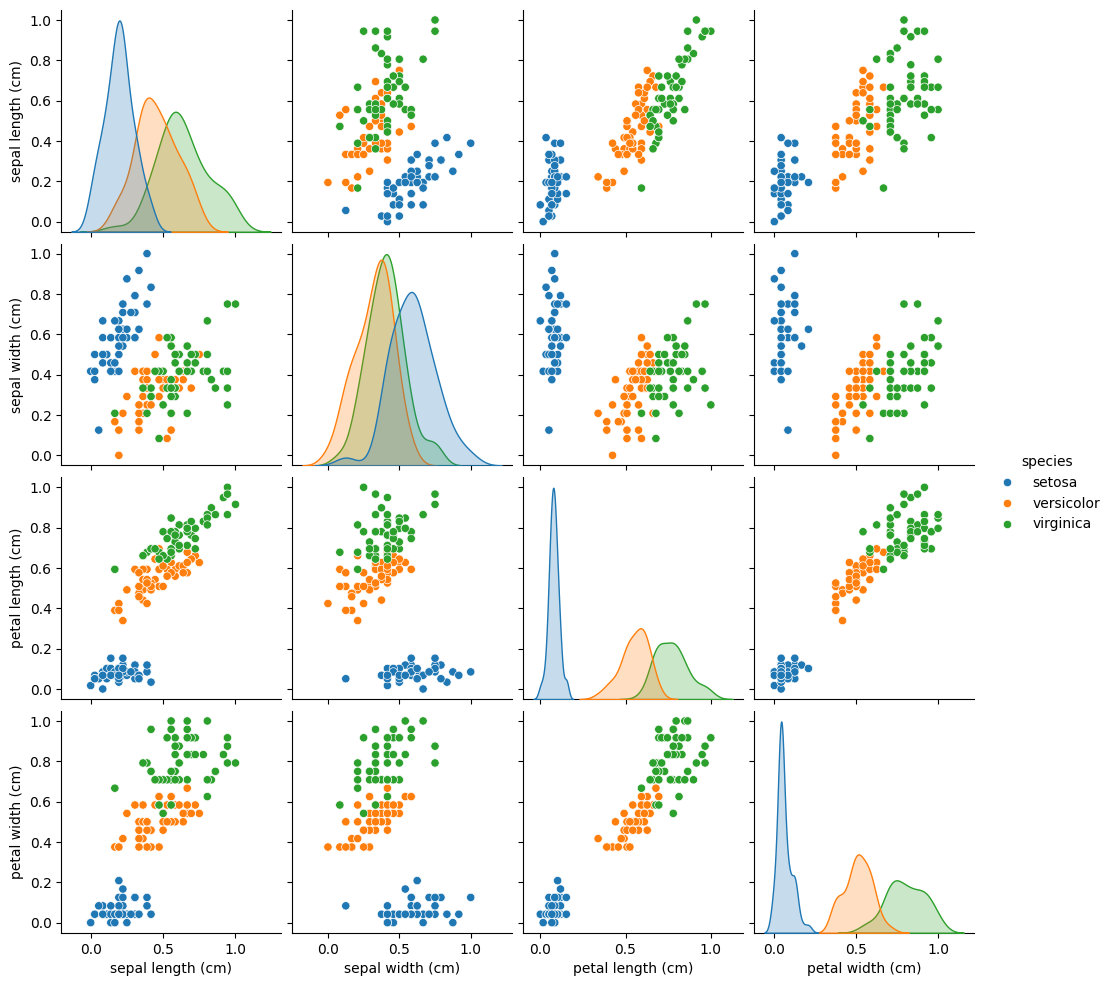

In [8]:
# Pairplot
sns.pairplot(
   iris_scaled,  # exclude encoded column
    hue='species',
    diag_kind='kde'
)
plt.show()


### *Pair Plot Interpretation – Iris Dataset*

This *pair plot* (scatter plot matrix) visualizes relationships between the four Iris flower features: `sepal length`, `sepal width`, `petal length`, `petal width`.

---

### *Plot Components*

* *Diagonal (KDE plots):* Show distribution of each variable.
  *Example:* *Setosa* has smaller `sepal length` than *virginica*, with *versicolor* in between.

* *Off-diagonal (Scatter plots):* Show pairwise relationships between variables.
  *Example:* `sepal width` vs. `sepal length` highlights some overlap between *versicolor* and *virginica*.



### *Key Insights*

* *Petal measurements:* Excellent predictors; *setosa* is clearly separable, while *versicolor* and *virginica* mostly separate.
* *Sepal measurements:* Less effective; significant overlap between *versicolor* and *virginica*.
* *Correlations:* Strong positive correlation between `petal length` and `petal width`; moderate correlation between `sepal length` and petal features.




### *Conclusion*

The plot shows distinct physical characteristics among the three species, especially in *petal dimensions*. *Petal measurements alone* can classify species with high accuracy, with *setosa* easily separable from the others.

---




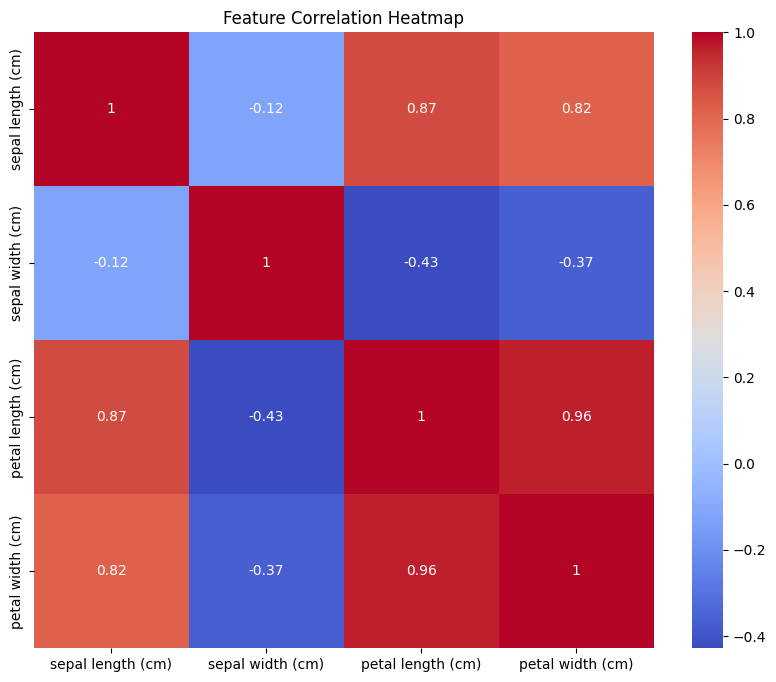

In [9]:
# Correlation heatmap
feature_col=iris_scaled.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(feature_col, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()



## *Insights*
---

*This visualization is a **Feature Correlation Heatmap** of the Iris dataset, quantifying the linear relationships between every pair of features using the **Pearson correlation coefficient**. The coefficient ranges from -1 (perfect negative) to +1 (perfect positive), with color intensity making strong relationships easy to spot.*

### *What the Chart Shows*

* *+1 (Dark Red): Perfect positive correlation — both variables increase together.*
* *-1 (Dark Blue): Perfect negative correlation — one variable increases as the other decreases.*
* *0 (White/Light Gray): No linear relationship between variables.*

---

### *Key Insights*

* *Strongest Positive Correlation:*

  * *`petal length (cm)` ↔ `petal width (cm)` → **0.96***
  * *Extremely strong, consistent upward relationship. Matches the tight, sloped cluster seen in pair plots.*

* *Other Strong Positive Correlations:*

  * *`sepal length (cm)` ↔ `petal length (cm)` → **0.87***
  * *`sepal length (cm)` ↔ `petal width (cm)` → **0.82***
  * *Longer sepals are typically paired with longer and wider petals.*

* *Moderate Negative Correlations:*

  * *`sepal width (cm)` ↔ `petal length (cm)` → **-0.43***
  * *`sepal width (cm)` ↔ `petal width (cm)` → **-0.37***
  * *Wider sepals tend to correspond to smaller petals.*

* *Very Weak Correlation:*

  * *`sepal length (cm)` ↔ `sepal width (cm)` → **-0.12***
  * *Almost no linear relationship; scatter plot appears random.*

---

### *Conclusion*

* *Petal measurements are strongly correlated and effective for separating species.*
* *Sepal width behaves differently, showing weaker or negative relationships with other features.*
* *This numerical analysis confirms the visual patterns from the pair plots and aids in feature selection for machine learning.*

---

## *3c: Identify potential outliers using boxplots*

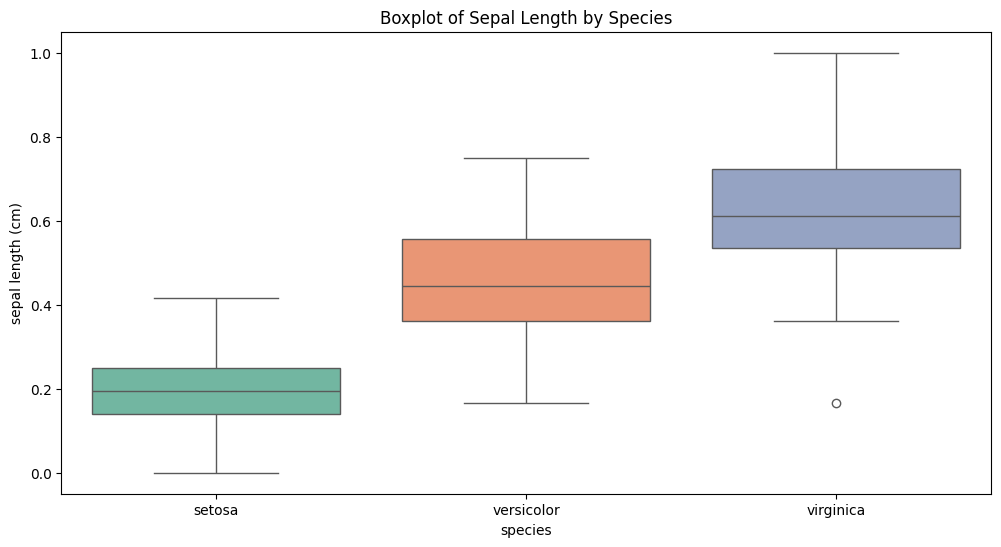

In [10]:
# Visualizing with Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=iris_scaled, x='species', y='sepal length (cm)', palette='Set2')
plt.title("Boxplot of Sepal Length by Species")
plt.show()
plt.close()

## *Handling Outliers using IQR*

In [11]:
# Remove outliers based on the IQR method
Q1 = iris_scaled[iris.feature_names].quantile(0.25)
Q3 = iris_scaled[iris.feature_names].quantile(0.75)
IQR = Q3 - Q1
iris_no_outliers = iris_scaled[~((iris_scaled[iris.feature_names] < (Q1 - 1.5 * IQR)) | (iris_scaled[iris.feature_names] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check for outliers
outliers = iris_scaled[~iris_scaled.index.isin(iris_no_outliers.index)]
print(f"Outliers detected:\n",outliers)

Outliers detected:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
15           0.388889          1.000000           0.084746          0.125000   
32           0.250000          0.875000           0.084746          0.000000   
33           0.333333          0.916667           0.067797          0.041667   
60           0.194444          0.000000           0.423729          0.375000   

       species  
15      setosa  
32      setosa  
33      setosa  
60  versicolor  


### *Outlier Analysis Results*
*Looks like your IQR check flagged some lower-end outliers, mostly in petal length and petal width, with a few in sepal dimensions. Interestingly, all belong to setosa except one versicolor, which makes sense — setosa flowers are naturally smaller, so their measurements fall near the lower tails.*

### *Export Preprocessed Data*

In [14]:
# Save the data without outliers
iris_no_outliers.to_csv("iris_preprocessed.csv", index=False)

## *Step 4: Train/Test Split Function*

*split the dataset into training and testing sets with an `80/20 `ratio, ensuring stratification by class labels to preserve the original class distribution. This prepares data for supervised learning tasks.*



In [ ]:
from sklearn.model_selection import train_test_split
X = iris_no_outliers[iris.feature_names]
y = iris_no_outliers['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 116
Testing set size: 30
